In [1]:
import pandas as pd

In [2]:
from datetime import datetime

- lien données
https://www.kaggle.com/competitions/bike-sharing-demand/data

In [3]:
df_train = pd.read_csv("../data/train.csv")

In [4]:
df_train["is_test"] = 0

In [5]:
df_test = pd.read_csv("../data/test.csv")
df_train["is_test"] = 1

In [6]:
df_data = pd.concat([df_train,df_test],axis=0)

In [7]:
df_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_test
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,NaN


In [8]:
df_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
is_test       float64
dtype: object

In [10]:
df_data["datetime"] = pd.to_datetime(df_data["datetime"],format="%Y-%m-%d %H:%M:%S")

In [13]:
df_data["month"] = df_data["datetime"].dt.month

In [14]:
df_data["datetime"].dt.dayofweek

0       5
1       5
2       5
3       5
4       5
       ..
6488    0
6489    0
6490    0
6491    0
6492    0
Name: datetime, Length: 17379, dtype: int64

In [11]:
df_data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                float64
is_test              float64
dtype: object

<AxesSubplot:xlabel='datetime'>

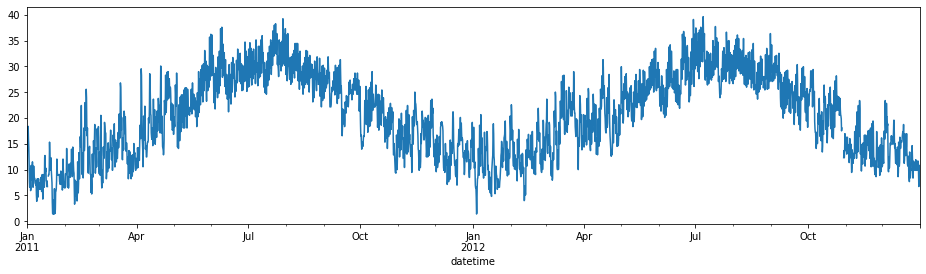

In [22]:
df_data.set_index("datetime")["temp"].resample("6H").mean().plot(figsize=(16,4))

In [25]:
df_data.groupby("datetime")["temp"].mean().resample("6H").mean()

datetime
2011-01-01 00:00:00     9.566667
2011-01-01 06:00:00    11.753333
2011-01-01 12:00:00    18.040000
2011-01-01 18:00:00    17.083333
2011-01-02 00:00:00    18.368000
                         ...    
2012-12-30 18:00:00     9.566667
2012-12-31 00:00:00     6.696667
2012-12-31 06:00:00     7.243333
2012-12-31 12:00:00    10.796667
2012-12-31 18:00:00    10.660000
Freq: 6H, Name: temp, Length: 2924, dtype: float64

In [23]:
df_data.set_index("datetime")["temp"].resample("6H").mean()

datetime
2011-01-01 00:00:00     9.566667
2011-01-01 06:00:00    11.753333
2011-01-01 12:00:00    18.040000
2011-01-01 18:00:00    17.083333
2011-01-02 00:00:00    18.368000
                         ...    
2012-12-30 18:00:00     9.566667
2012-12-31 00:00:00     6.696667
2012-12-31 06:00:00     7.243333
2012-12-31 12:00:00    10.796667
2012-12-31 18:00:00    10.660000
Freq: 6H, Name: temp, Length: 2924, dtype: float64

In [13]:
df_data.shape

(17379, 14)

In [14]:
df_data.groupby("datetime")["temp"].mean().resample("6H").mean()

datetime
2011-01-01 00:00:00     9.566667
2011-01-01 06:00:00    11.753333
2011-01-01 12:00:00    18.040000
2011-01-01 18:00:00    17.083333
2011-01-02 00:00:00    18.368000
                         ...    
2012-12-30 18:00:00     9.566667
2012-12-31 00:00:00     6.696667
2012-12-31 06:00:00     7.243333
2012-12-31 12:00:00    10.796667
2012-12-31 18:00:00    10.660000
Freq: 6H, Name: temp, Length: 2924, dtype: float64

<AxesSubplot:xlabel='datetime'>

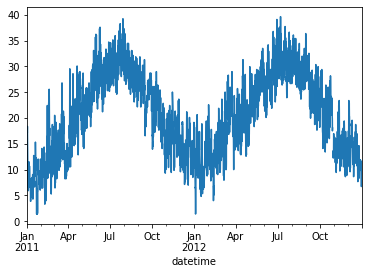

In [15]:
df_data.groupby("datetime")["temp"].mean().resample("6H").mean().plot()

<AxesSubplot:xlabel='datetime'>

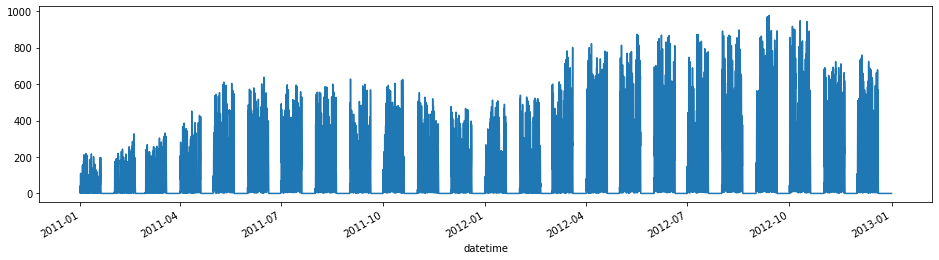

In [18]:
df_data.groupby("datetime")["count"].sum().plot(figsize=(16,4))

<AxesSubplot:xlabel='datetime'>

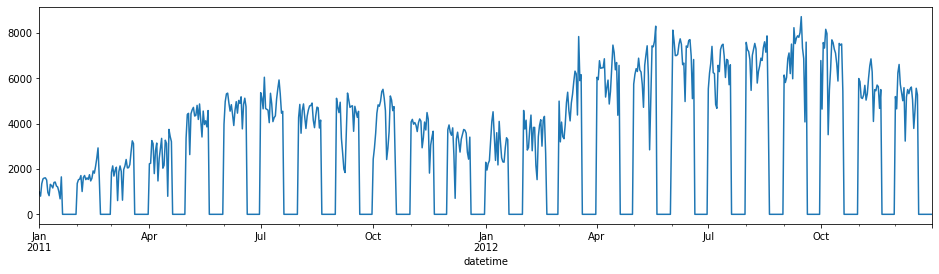

In [19]:
df_data.groupby("datetime")["count"].sum().resample("D").sum().plot(figsize=(16,4))

<AxesSubplot:xlabel='datetime'>

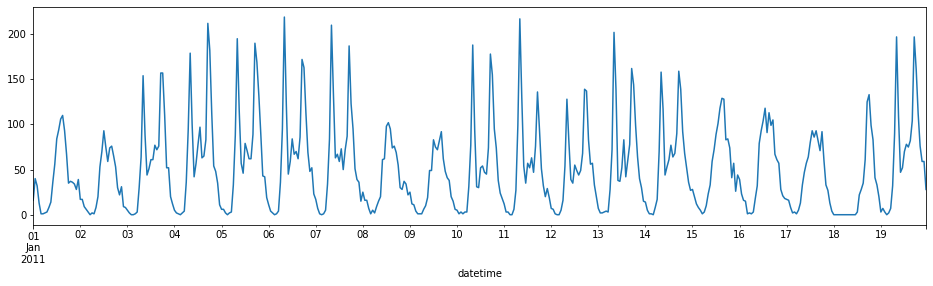

In [26]:
df_data[df_data["datetime"]<datetime(2011,1,20)].groupby("datetime")["count"].sum().resample("1H").sum().plot(figsize=(16,4))

<AxesSubplot:xlabel='datetime'>

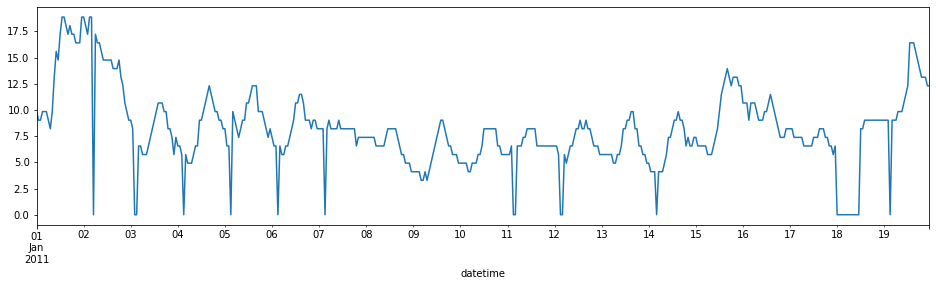

In [22]:
df_data[df_data["datetime"]<datetime(2011,1,20)].groupby("datetime")["temp"].mean().resample("1H").sum().plot(figsize=(16,4))

<AxesSubplot:xlabel='date'>

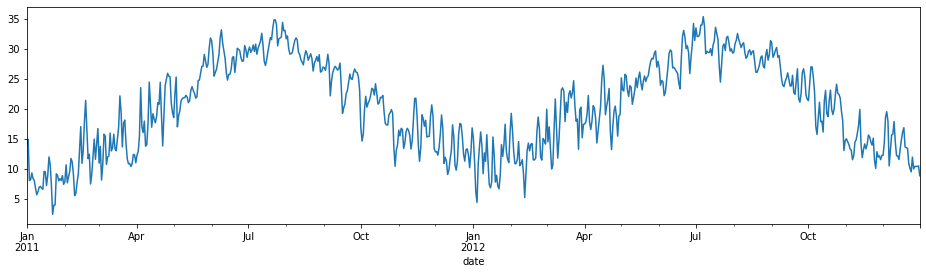

In [54]:
df_data.groupby("datetime")["temp"].mean().resample("D").mean().plot(figsize=(16,4))

<AxesSubplot:xlabel='date'>

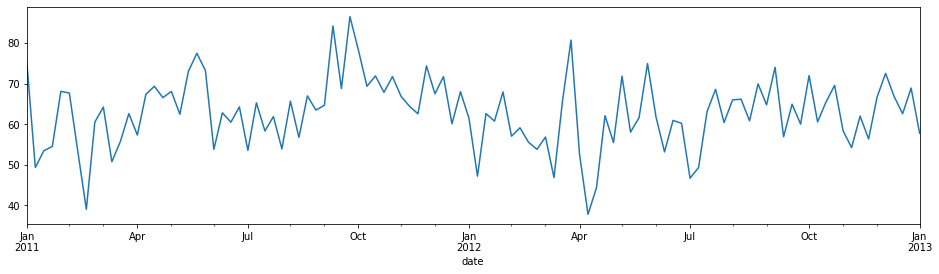

In [61]:
df_data.groupby("datetime")["humidity"].mean().resample("W").mean().plot(figsize=(16,4))

In [30]:
df_data["y_3h"] = df_data["count"].rolling(3,min_periods=1).sum().shift(-2)

In [32]:
for i in [3,6,24]:
    df_data["count_%sh_p_mean"%(i)] = df_data["count"].rolling(i,min_periods=1).mean().shift(1)

In [152]:
df_data["count_24H"] = df_data["count"].shift(24)

In [153]:
df_data["count_1W"] = df_data["count"].shift(24*7)

In [127]:
df_data[df_data["count_24H"].notnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,is_test,month,y_3h,count_3h_p_mean,count_6h_p_mean,count_24h_p_mean,count_24H,temp_3h_p,hour
24,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4.0,...,17.0,1.0,1,43.0,33.666667,34.833333,41.041667,16.0,18.040000,0
25,2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1.0,...,17.0,1.0,1,32.0,28.000000,31.833333,41.083333,40.0,18.586667,1
26,2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,1.0,...,9.0,1.0,1,18.0,24.333333,28.500000,40.125000,32.0,18.040000,2
27,2011-01-02 03:00:00,1,0,0,2,18.86,22.725,94,12.9980,2.0,...,6.0,1.0,1,11.0,14.333333,24.000000,39.166667,13.0,18.040000,3
28,2011-01-02 04:00:00,1,0,0,2,18.86,22.725,94,12.9980,2.0,...,3.0,1.0,1,6.0,10.666667,19.333333,38.875000,1.0,18.313333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2011-01-20 19:00:00,1,0,1,1,10.66,11.365,56,22.0028,NaN,...,NaN,NaN,1,NaN,NaN,NaN,192.400000,336.0,11.206667,19
20,2011-01-20 20:00:00,1,0,1,2,10.66,12.120,60,19.0012,NaN,...,NaN,NaN,1,NaN,NaN,NaN,156.500000,241.0,10.660000,20
21,2011-01-20 21:00:00,1,0,1,2,9.84,11.365,60,16.9979,NaN,...,NaN,NaN,1,NaN,NaN,NaN,128.333333,168.0,10.386667,21
22,2011-01-20 22:00:00,1,0,1,2,9.84,10.605,65,19.0012,NaN,...,NaN,NaN,1,NaN,NaN,NaN,108.500000,129.0,10.113333,22


In [41]:
from sklearn.metrics import mean_absolute_error
considtion_notnull = df_data[["count_24H","count"]].notnull().all(axis=1) & df_data["count_24H"].notnull()
mean_absolute_error(df_data[considtion_notnull]["count_24H"],df_data[considtion_notnull]["count"])

66.4352789541521

In [42]:
df_data[considtion_notnull]["count"].mean()

191.90673909040692

In [23]:
df_data["y_3h"] = df_data["count"].rolling(3,min_periods=1).sum().shift(-2)

In [47]:
df_data["temp_3h_p"] = df_data["temp"].rolling(3,min_periods=1).mean()

In [48]:
for i in [3,6,24]:
    df_data["count_%sh_p_mean"%(i)] = df_data["count"].rolling(i,min_periods=1).mean().shift(1)
    
    

In [88]:
df_data["hour"] = df_data["datetime"].dt.hour

In [118]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [43]:
from sklearn.linear_model import LinearRegression

In [134]:
model = LinearRegression()

In [142]:
model = ExtraTreesRegressor()

In [ ]:
ExtraTreesRegressor()

In [122]:
model = RandomForestRegressor(max_depth=1,n_jobs=-1)

In [ ]:
model = RandomForestRegressor(max_depth=1,n_jobs=-1)

In [154]:
col_features = ["temp_3h_p","count_3h_p_mean","workingday","count_24H","hour","count_1W"]
col_target = "count"

In [155]:
condition_not_null = df_data[col_features +[col_target] ].notnull().all(axis=1)

In [156]:
condition_test = df_data["datetime"]> datetime(2012,1,1)

In [157]:
condition_test

0       False
1       False
2       False
3       False
4       False
        ...  
6488     True
6489     True
6490     True
6491     True
6492     True
Name: datetime, Length: 17379, dtype: bool

In [158]:
df_data[condition_not_null & ~condition_test]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,is_test,month,y_3h,count_3h_p_mean,count_6h_p_mean,count_24h_p_mean,count_24H,temp_3h_p,hour,count_1W
168,2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,1.0,...,1.0,1,44.0,2.666667,7.833333,63.208333,84.0,6.560000,7,16.0
169,2011-01-08 08:00:00,1,0,0,3,6.56,9.090,93,7.0015,0.0,...,1.0,1,96.0,5.333333,6.666667,60.083333,210.0,6.560000,8,40.0
170,2011-01-08 09:00:00,1,0,0,3,6.56,9.090,93,7.0015,0.0,...,1.0,1,143.0,8.666667,6.500000,51.958333,134.0,6.560000,9,32.0
171,2011-01-08 10:00:00,1,0,0,2,7.38,9.850,80,11.0014,5.0,...,1.0,1,221.0,14.666667,8.666667,47.208333,63.0,6.833333,10,13.0
172,2011-01-08 11:00:00,1,0,0,2,8.20,9.090,69,26.0027,2.0,...,1.0,1,262.0,32.000000,18.666667,47.125000,67.0,7.380000,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9.0,...,1.0,12,440.0,327.666667,247.833333,132.583333,104.0,15.306667,20,165.0
5419,2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15.0,...,1.0,12,294.0,270.333333,259.333333,136.833333,89.0,15.306667,21,121.0
5420,2011-12-19 22:00:00,4,0,1,2,14.76,17.425,57,11.0014,12.0,...,1.0,12,215.0,194.666667,254.000000,138.416667,49.0,15.306667,22,71.0
5421,2011-12-19 23:00:00,4,0,1,1,14.76,17.425,53,11.0014,10.0,...,1.0,12,201.0,146.666667,237.166667,140.833333,37.0,14.760000,23,45.0


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
SS = StandardScaler()

In [161]:
X_train = SS.fit_transform(df_data[condition_not_null & ~condition_test][col_features])
y_train = df_data[condition_not_null & ~condition_test]["count"]

In [162]:
X_test = SS.transform(df_data[condition_not_null & condition_test][col_features])
y_test = df_data[condition_not_null & condition_test]["count"]

In [163]:
y_test

5423      93.0
5424      75.0
5425      52.0
5426       8.0
5427       5.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 5463, dtype: float64

In [164]:
X_train

array([[-1.72462015, -1.17761   , -1.46452158, -0.46712281, -0.6613922 ,
        -0.95864468],
       [-1.72462015, -1.15585102, -1.46452158,  0.47240128, -0.5167075 ,
        -0.77947256],
       [-1.72462015, -1.1286523 , -1.46452158, -0.09429579, -0.37202279,
        -0.8391966 ],
       ...,
       [-0.60719473,  0.38903646,  0.68281684, -0.72810173,  1.5088784 ,
        -0.54804192],
       [-0.67703382, -0.00262516,  0.68281684, -0.81758021,  1.65356311,
        -0.74214504],
       [-0.67703382, -0.39972651, -1.46452158, -0.96671102, -1.67418515,
        -0.95117917]])

In [165]:
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [166]:
df_test = df_data[condition_not_null & condition_test].copy()

In [167]:
model.predict(X_test)

array([ 31.02,  28.68,  24.55, ..., 184.62, 118.67,  81.11])

In [168]:
df_test["pred"] =model.predict(X_test)

In [169]:
df_test[["datetime","count","pred"]]

,datetime,count,pred
5423,2012-01-01 01:00:00,93.0,31.02
5424,2012-01-01 02:00:00,75.0,28.68
5425,2012-01-01 03:00:00,52.0,24.55
5426,2012-01-01 04:00:00,8.0,10.08
5427,2012-01-01 05:00:00,5.0,19.57
...,...,...,...
10881,2012-12-19 19:00:00,336.0,312.18
10882,2012-12-19 20:00:00,241.0,237.37
10883,2012-12-19 21:00:00,168.0,184.62
10884,2012-12-19 22:00:00,129.0,118.67


In [170]:
df_test[["datetime","count","pred"]]

,datetime,count,pred
5423,2012-01-01 01:00:00,93.0,31.02
5424,2012-01-01 02:00:00,75.0,28.68
5425,2012-01-01 03:00:00,52.0,24.55
5426,2012-01-01 04:00:00,8.0,10.08
5427,2012-01-01 05:00:00,5.0,19.57
...,...,...,...
10881,2012-12-19 19:00:00,336.0,312.18
10882,2012-12-19 20:00:00,241.0,237.37
10883,2012-12-19 21:00:00,168.0,184.62
10884,2012-12-19 22:00:00,129.0,118.67


In [171]:
mean_absolute_error(df_test["count"],df_test["pred"])

62.590671792055645

In [140]:
print("mae avec SS",model,mean_absolute_error(df_test["count"],df_test["pred"]))

mae avec SS LinearRegression() 78.42731133124319


In [116]:
print("mae extratree",model,mean_absolute_error(df_test["count"],df_test["pred"]))

mae extratree ExtraTreesRegressor() 62.08577338458721


In [126]:
print("mae ",model,mean_absolute_error(df_test["count"],df_test["pred"]))

mae  RandomForestRegressor(max_depth=1, n_jobs=-1) 117.98127157877373


In [173]:
mean_absolute_error(df_test["count"],df_test["count_1W"])

83.99194581731649

In [84]:
model.coef_

array([0.50429818, 0.32437108, 2.98325644, 0.60891739])

In [141]:
model.coef_

array([ 3.20567315, 41.67734234,  1.49197084, 81.88975958, -3.70718711])

<AxesSubplot:xlabel='datetime'>

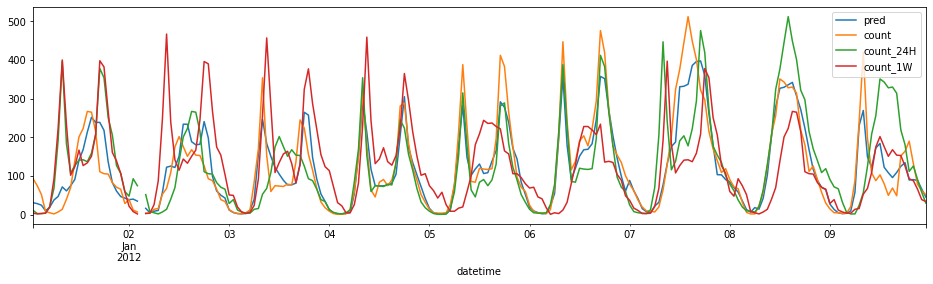

In [172]:
df_test[df_test["datetime"]<datetime(2012,1,10)].set_index("datetime")[["pred","count","count_24H","count_1W"]].resample("H").mean().plot(figsize=(16,4))